<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Using-the-platform" data-toc-modified-id="Using-the-platform-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using the platform</a></span><ul class="toc-item"><li><span><a href="#Lines" data-toc-modified-id="Lines-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Lines</a></span></li></ul></li><li><span><a href="#Basic-Setup" data-toc-modified-id="Basic-Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basic Setup</a></span></li><li><span><a href="#Setting-the-Cash" data-toc-modified-id="Setting-the-Cash-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Setting the Cash</a></span></li><li><span><a href="#Adding-a-Data-Feed" data-toc-modified-id="Adding-a-Data-Feed-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Adding a Data Feed</a></span></li><li><span><a href="#Our-First-Strategy" data-toc-modified-id="Our-First-Strategy-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Our First Strategy</a></span></li><li><span><a href="#Adding-some-Logic-to-the-Strategy" data-toc-modified-id="Adding-some-Logic-to-the-Strategy-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Adding some Logic to the Strategy</a></span></li><li><span><a href="#Do-not-only-buy-…-but-SELL" data-toc-modified-id="Do-not-only-buy-…-but-SELL-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Do not only buy … but SELL</a></span></li><li><span><a href="#The-broker-says:-Show-me-the-money!" data-toc-modified-id="The-broker-says:-Show-me-the-money!-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>The broker says: Show me the money!</a></span></li><li><span><a href="#Customizing-the-Strategy:-Parameters" data-toc-modified-id="Customizing-the-Strategy:-Parameters-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Customizing the Strategy: Parameters</a></span></li><li><span><a href="#Adding-an-indicator" data-toc-modified-id="Adding-an-indicator-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Adding an indicator</a></span></li><li><span><a href="#Visual-Inspection:-Plotting" data-toc-modified-id="Visual-Inspection:-Plotting-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Visual Inspection: Plotting</a></span></li><li><span><a href="#Let’s-Optimize" data-toc-modified-id="Let’s-Optimize-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Let’s Optimize</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Using the platform
## Lines

Data Feeds, Indicators and Strategies have lines.

A line is a succession of points that when joined together form this line.

In [1]:
from __future__ import (absolute_import, division, print_function,unicode_literals)
#从上一级目录中找到backtrader包
import sys,os
BASE_DIR=os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__')))) #获取上上级目录
sys.path.append(BASE_DIR) #添加路径
#print(BASE_DIR)   #D:\gitee\学习笔记\源码学习\backtrader-master



# Import the backtrader platform

import backtrader as bt
import backtrader.indicators as btind
import backtrader.feeds as btfeeds
import datetime  # For datetime objects

# Basic Setup

In [3]:
if __name__ == '__main__':
    cerebro = bt.Cerebro()

    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    cerebro.run()

    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

    
#The Cerebro engine has created a broker instance in the background


Starting Portfolio Value: 10000.00
Final Portfolio Value: 10000.00


# Setting the Cash

In [58]:
if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.broker.setcash(100.0)

    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    cerebro.run()

    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100.00
Final Portfolio Value: 100.00


# Adding a Data Feed

In [14]:
if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    #Finding out where our example script is to be able to locate the sample Data Feed file
    modpath = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))#!转到d:\gitee\学习笔记\源码学习\backtrader-master
    datapath = os.path.join(modpath, 'datas/orcl-1995-2014.txt')


    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values after this date
        todate=datetime.datetime(2000, 12, 31),
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 10000.00
Final Portfolio Value: 10000.00


# Our First Strategy
The strategy next method will be called on each bar of the system clock (self.datas[0]). This is true until other things come into play like indicators, which need some bars to start producing an output.

The first data in the list self.datas[0] is the default data for trading operations and to keep all strategy elements synchronized (it’s the system clock)

In [59]:
# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function for this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # !Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def next(self):
        # Simply log the closing price of the series from the reference
        # The strategy next method will be called on each bar of the system clock (self.datas[0]). 
        # This is true until other things comeinto play like indicators, which need some bars to start producing an output. More on that later.
        self.log('Close, %.2f' % self.dataclose[0])


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))
    datapath = os.path.join(modpath, 'datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(1995, 1, 3),
        # Do not pass values before this date
        todate=datetime.datetime(1995, 2, 2),#!不包含这一天
        # Do not pass values after this date
        reverse=False)#reverse=False表示时间是从老到新

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
1995-01-03, Close, 1.88
1995-01-04, Close, 1.90
1995-01-05, Close, 1.86
1995-01-06, Close, 1.88
1995-01-09, Close, 1.94
1995-01-10, Close, 1.94
1995-01-11, Close, 1.89
1995-01-12, Close, 1.87
1995-01-13, Close, 1.85
1995-01-16, Close, 1.84
1995-01-17, Close, 1.91
1995-01-18, Close, 1.90
1995-01-19, Close, 1.97
1995-01-20, Close, 1.93
1995-01-23, Close, 1.89
1995-01-24, Close, 1.88
1995-01-25, Close, 1.92
1995-01-26, Close, 1.88
1995-01-27, Close, 1.88
1995-01-30, Close, 1.83
1995-01-31, Close, 1.87
1995-02-01, Close, 1.86
Final Portfolio Value: 100000.00


 backtrader会根据Adj Close来自动调整Open,High,Low,Close
 
 ```
Date,     Open,    High,    Low,    Close,   Adj Close,  Volume
1995-01-03,2.179012,2.191358,2.117284,2.117284,1.883304,36301200
1995-01-04,2.123457,2.148148,2.092592,2.135803,1.899776,46051600
1995-01-05,2.141975,2.148148,2.086420,2.092592,1.861340,37762800
1995-01-06,2.092592,2.154321,2.061728,2.117284,1.883304,41864400
1995-01-09,2.135803,2.179012,2.129630,2.179012,1.938211,34639200
1995-01-10,2.191358,2.216049,2.185185,2.185185,1.943701,42088000
1995-01-11,2.203704,2.216049,2.098765,2.120370,1.886049,46762000
1995-01-12,2.123457,2.129630,2.086420,2.104938,1.872322,41294400
1995-01-13,2.129630,2.145062,2.074074,2.080247,1.850359,55039200
1995-01-16,2.024691,2.080247,1.975309,2.067901,1.839378,54574800
1995-01-17,2.067901,2.141975,2.067901,2.141975,1.905266,39588000
1995-01-18,2.135803,2.160494,2.129630,2.135803,1.899776,28841200
1995-01-19,2.129630,2.216049,2.117284,2.209877,1.965664,55818000
1995-01-20,2.209877,2.216049,2.129630,2.169753,1.929974,48518800
1995-01-23,2.154321,2.154321,2.098765,2.123457,1.888794,37551600
1995-01-24,2.123457,2.135803,2.086420,2.117284,1.883304,28960800
1995-01-25,2.104938,2.197531,2.086420,2.160494,1.921738,67278400
1995-01-26,2.154321,2.160494,2.117284,2.117284,1.883304,27543600
1995-01-27,2.123457,2.135803,2.086420,2.111111,1.877813,35708400
1995-01-30,2.111111,2.117284,2.055556,2.061728,1.833888,44440000
1995-01-31,2.074074,2.129630,2.061728,2.104938,1.872322,37908400
1995-02-01,2.129630,2.141975,2.080247,2.092592,1.861340,24384400
1995-02-02,2.092592,2.123457,2.080247,2.117284,1.883304,24165600
1995-02-03,2.135803,2.197531,2.123457,2.172839,1.932719,53942800
```

# Adding some Logic to the Strategy
策略

If the price has been falling 3 sessions in a row … BUY BUY BUY!!!


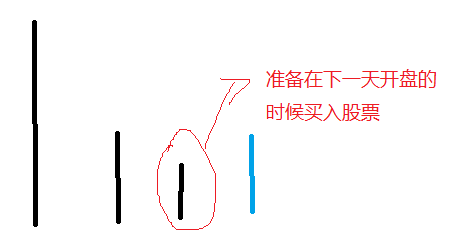


A股(中国沪深市场)：周一至五9:30-11:30 PM1:00-3:00

今天的开盘价，是今天早上开盘前9：15-9：25之间买卖各方申报的委托价格，根据集合竞价原则由电脑撮合成交的第一笔交易的价格。
在9点15开始集合竞价，那一瞬间理论上价格是昨日收盘价。
集合竞价撮合交易之后，在9点25分把双方挂单最集中的一个价位作为今日开盘价。但涨跌的基点以昨日收盘价为标准

1、普通交易时间

9:15 — 9:20 开盘集合竞价，可申可撤

9:20 — 9:25 开盘集合竞价，可申不可撤

9:25 — 9:30 沪市：不接受申报，委托暂存于券商主机，在9:30时发送至交易所；深市：只接受申报，不对买卖申报或撤销申报作处理。

9:30 — 11:30 连续竞价时间

11:30 — 13:00 委托暂存于于券商主机，在13:00时发送至交易所

13:00 — 14:57 深市：连续竞价时间

14:57 — 15:00 深市：收盘集合竞价，可申不可撤

13:00 — 15:00 沪市：连续竞价时间


In [2]:
# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        if self.dataclose[0] < self.dataclose[-1]:
            # current close less than previous close

            if self.dataclose[-1] < self.dataclose[-2]:
                # previous close less than the previous close

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('------->BUY CREATE, %.2f' % self.dataclose[0])
                self.buy()#. The broker (shown in previous examples) executes this using the opening price of the next bar,


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))
    datapath = os.path.join(modpath, 'datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(1995, 1, 3),#包含这一天
        # Do not pass values before this date
        todate=datetime.datetime(1995, 2, 2),#!不包含这一天
        # Do not pass values after this date
        reverse=False)#reverse=False表示时间是从老到新

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    '''
Date,     Open,    High,    Low,    Close,   Adj Close,  Volume
1995-01-03,2.179012,2.191358,2.117284,2.117284,1.883304,36301200
1995-01-04,2.123457,2.148148,2.092592,2.135803,1.899776,46051600
1995-01-05,2.141975,2.148148,2.086420,2.092592,1.861340,37762800
1995-01-06,2.092592,2.154321,2.061728,2.117284,1.883304,41864400
1995-01-09,2.135803,2.179012,2.129630,2.179012,1.938211,34639200
1995-01-10,2.191358,2.216049,2.185185,2.185185,1.943701,42088000
1995-01-11,2.203704,2.216049,2.098765,2.120370,1.886049,46762000
1995-01-12,2.123457,2.129630,2.086420,2.104938,1.872322,41294400
1995-01-13,2.129630,2.145062,2.074074,2.080247,1.850359,55039200
1995-01-16,2.024691,2.080247,1.975309,2.067901,1.839378,54574800
1995-01-17,2.067901,2.141975,2.067901,2.141975,1.905266,39588000
1995-01-18,2.135803,2.160494,2.129630,2.135803,1.899776,28841200
1995-01-19,2.129630,2.216049,2.117284,2.209877,1.965664,55818000
1995-01-20,2.209877,2.216049,2.129630,2.169753,1.929974,48518800
1995-01-23,2.154321,2.154321,2.098765,2.123457,1.888794,37551600
1995-01-24,2.123457,2.135803,2.086420,2.117284,1.883304,28960800
1995-01-25,2.104938,2.197531,2.086420,2.160494,1.921738,67278400
1995-01-26,2.154321,2.160494,2.117284,2.117284,1.883304,27543600
1995-01-27,2.123457,2.135803,2.086420,2.111111,1.877813,35708400
1995-01-30,2.111111,2.117284,2.055556,2.061728,1.833888,44440000
1995-01-31,2.074074,2.129630,2.061728,2.104938,1.872322,37908400
1995-02-01,2.129630,2.141975,2.080247,2.092592,1.861340,24384400
1995-02-02,2.092592,2.123457,2.080247,2.117284,1.883304,24165600
1995-02-03,2.135803,2.197531,2.123457,2.172839,1.932719,53942800
    
    '''


Starting Portfolio Value: 100000.00
1995-01-03, Close, 1.88
1995-01-04, Close, 1.90
1995-01-05, Close, 1.86
1995-01-06, Close, 1.88
1995-01-09, Close, 1.94
1995-01-10, Close, 1.94
1995-01-11, Close, 1.89
1995-01-12, Close, 1.87
1995-01-12, ------->BUY CREATE, 1.87
1995-01-13, Close, 1.85
1995-01-13, ------->BUY CREATE, 1.85
1995-01-16, Close, 1.84
1995-01-16, ------->BUY CREATE, 1.84
1995-01-17, Close, 1.91
1995-01-18, Close, 1.90
1995-01-19, Close, 1.97
1995-01-20, Close, 1.93
1995-01-23, Close, 1.89
1995-01-23, ------->BUY CREATE, 1.89
1995-01-24, Close, 1.88
1995-01-24, ------->BUY CREATE, 1.88
1995-01-25, Close, 1.92
1995-01-26, Close, 1.88
1995-01-27, Close, 1.88
1995-01-30, Close, 1.83
1995-01-31, Close, 1.87
1995-02-01, Close, 1.86
Final Portfolio Value: 100000.01


- The order was created but it is unknown if it was executed, when and at what price.
- The broker (shown in previous examples) executes this using the opening price of the next bar, because that’s the 1st tick after the current under examination bar.
- The order is executed so far without any commission

# Do not only buy … but SELL
The “exit concept” will be an easy one:

Exit after 2 bars (on the 3th bar) have elapsed for good or for worse

Please notice that there is no “time” or “timeframe” implied: number of bars. The bars can represent 1 minute, 1 hour, 1 day, 1 week or any other time period.


- Methods _buy_ and _sell_ return the **created** (not yet executed) order
    
- Changes in orders’ status will be notified to the strategy via a _notify_ method

The next method gets no “bar index” passed and therefore it seems obscure how to understand when 5 bars may have elapsed, but this has been modeled in pythonic way: call len on an object and it will tell you the length of its lines

In [10]:
# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders
        self.order = None

    def notify_order(self, order):#^Changes in orders’ status will be notified to the strategy via a notify method
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        #! Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('------->BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('------->SELL EXECUTED, %.2f' % order.executed.price)

            self.bar_executed = len(self)#^新建了一个变量self.bar_executed用于记录执行当前买单时的bar数(注意是在第二天早上完成购买)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('------->Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] < self.dataclose[-1]:
                    # current close less than previous close

                    if self.dataclose[-1] < self.dataclose[-2]:
                        # previous close less than the previous close

                        # BUY, BUY, BUY!!! (with default parameters)
                        self.log('------->BUY CREATE, %.2f' % self.dataclose[0])

                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.buy()

        else:

            # Already in the market ... we might sell
            if len(self) >= (self.bar_executed + 2):#^Exit after 5 bars (on the 6th bar) have elapsed for good or for worse
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('------->SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))
    datapath = os.path.join(modpath, 'datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(1995, 1, 3),#包含这一天
        # Do not pass values before this date
        todate=datetime.datetime(1995, 2, 2),#!不包含这一天
        # Do not pass values after this date
        reverse=False)#reverse=False表示时间是从老到新

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    
    '''
Date,     Open,    High,    Low,    Close,   Adj Close,  Volume
1995-01-03,2.179012,2.191358,2.117284,2.117284,1.883304,36301200
1995-01-04,2.123457,2.148148,2.092592,2.135803,1.899776,46051600
1995-01-05,2.141975,2.148148,2.086420,2.092592,1.861340,37762800
1995-01-06,2.092592,2.154321,2.061728,2.117284,1.883304,41864400
1995-01-09,2.135803,2.179012,2.129630,2.179012,1.938211,34639200
1995-01-10,2.191358,2.216049,2.185185,2.185185,1.943701,42088000
1995-01-11,2.203704,2.216049,2.098765,2.120370,1.886049,46762000
1995-01-12,2.123457,2.129630,2.086420,2.104938,1.872322,41294400
1995-01-13,2.129630,2.145062,2.074074,2.080247,1.850359,55039200
1995-01-16,2.024691,2.080247,1.975309,2.067901,1.839378,54574800
1995-01-17,2.067901,2.141975,2.067901,2.141975,1.905266,39588000
1995-01-18,2.135803,2.160494,2.129630,2.135803,1.899776,28841200
1995-01-19,2.129630,2.216049,2.117284,2.209877,1.965664,55818000
1995-01-20,2.209877,2.216049,2.129630,2.169753,1.929974,48518800
1995-01-23,2.154321,2.154321,2.098765,2.123457,1.888794,37551600
1995-01-24,2.123457,2.135803,2.086420,2.117284,1.883304,28960800
1995-01-25,2.104938,2.197531,2.086420,2.160494,1.921738,67278400
1995-01-26,2.154321,2.160494,2.117284,2.117284,1.883304,27543600
1995-01-27,2.123457,2.135803,2.086420,2.111111,1.877813,35708400
1995-01-30,2.111111,2.117284,2.055556,2.061728,1.833888,44440000
1995-01-31,2.074074,2.129630,2.061728,2.104938,1.872322,37908400
1995-02-01,2.129630,2.141975,2.080247,2.092592,1.861340,24384400
1995-02-02,2.092592,2.123457,2.080247,2.117284,1.883304,24165600
1995-02-03,2.135803,2.197531,2.123457,2.172839,1.932719,53942800
    
    '''


Starting Portfolio Value: 100000.00
1995-01-03, Close, 1.88
1995-01-04, Close, 1.90
1995-01-05, Close, 1.86
1995-01-06, Close, 1.88
1995-01-09, Close, 1.94
1995-01-10, Close, 1.94
1995-01-11, Close, 1.89
1995-01-12, Close, 1.87
1995-01-12, ------->BUY CREATE, 1.87
1995-01-13, ------->BUY EXECUTED, 1.89
1995-01-13, Close, 1.85
1995-01-16, Close, 1.84
1995-01-17, Close, 1.91
1995-01-17, ------->SELL CREATE, 1.91
1995-01-18, ------->SELL EXECUTED, 1.90
1995-01-18, Close, 1.90
1995-01-19, Close, 1.97
1995-01-20, Close, 1.93
1995-01-23, Close, 1.89
1995-01-23, ------->BUY CREATE, 1.89
1995-01-24, ------->BUY EXECUTED, 1.89
1995-01-24, Close, 1.88
1995-01-25, Close, 1.92
1995-01-26, Close, 1.88
1995-01-26, ------->SELL CREATE, 1.88
1995-01-27, ------->SELL EXECUTED, 1.89
1995-01-27, Close, 1.88
1995-01-30, Close, 1.83
1995-01-31, Close, 1.87
1995-02-01, Close, 1.86
Final Portfolio Value: 100000.01


# The broker says: Show me the money!

Gross Profit 毛利润

Net Profit 净利润

毛利润=产品收入-产品成本 （不含所得税）
净利润=毛利润-所得税。

净重=毛重-皮重(包装物的重量)

比如:一箱苹果(含包装箱)重5公斤,箱重1公斤,苹果重=5-1=4公斤,即,这箱苹果毛重5公斤,净重4公斤。

The “NET” profit is already cash in the bag.

In [18]:
# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Value: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f,Value: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] < self.dataclose[-1]:
                    # current close less than previous close

                    if self.dataclose[-1] < self.dataclose[-2]:
                        # previous close less than the previous close

                        # BUY, BUY, BUY!!! (with default parameters)
                        self.log('BUY CREATE, %.2f' % self.dataclose[0])

                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.buy()#!默认就是买一股

        else:

            # Already in the market ... we might sell
            if len(self) >= (self.bar_executed + 5):
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))
    datapath = os.path.join(modpath, 'datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(1995, 1, 3),#包含这一天
        # Do not pass values before this date
        todate=datetime.datetime(1995, 2, 2),#!不包含这一天
        # Do not pass values after this date
        reverse=False)#reverse=False表示时间是从老到新
    
    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    # Set the commission - 1% ... divide by 100 to remove the %
    cerebro.broker.setcommission(commission=0.01)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

    '''
Date,     Open,    High,    Low,    Close,   Adj Close,  Volume
1995-01-03,2.179012,2.191358,2.117284,2.117284,1.883304,36301200
1995-01-04,2.123457,2.148148,2.092592,2.135803,1.899776,46051600
1995-01-05,2.141975,2.148148,2.086420,2.092592,1.861340,37762800
1995-01-06,2.092592,2.154321,2.061728,2.117284,1.883304,41864400
1995-01-09,2.135803,2.179012,2.129630,2.179012,1.938211,34639200
1995-01-10,2.191358,2.216049,2.185185,2.185185,1.943701,42088000
1995-01-11,2.203704,2.216049,2.098765,2.120370,1.886049,46762000
1995-01-12,2.123457,2.129630,2.086420,2.104938,1.872322,41294400
1995-01-13,2.129630,2.145062,2.074074,2.080247,1.850359,55039200
1995-01-16,2.024691,2.080247,1.975309,2.067901,1.839378,54574800
1995-01-17,2.067901,2.141975,2.067901,2.141975,1.905266,39588000
1995-01-18,2.135803,2.160494,2.129630,2.135803,1.899776,28841200
1995-01-19,2.129630,2.216049,2.117284,2.209877,1.965664,55818000
1995-01-20,2.209877,2.216049,2.129630,2.169753,1.929974,48518800
1995-01-23,2.154321,2.154321,2.098765,2.123457,1.888794,37551600
1995-01-24,2.123457,2.135803,2.086420,2.117284,1.883304,28960800
1995-01-25,2.104938,2.197531,2.086420,2.160494,1.921738,67278400
1995-01-26,2.154321,2.160494,2.117284,2.117284,1.883304,27543600
1995-01-27,2.123457,2.135803,2.086420,2.111111,1.877813,35708400
1995-01-30,2.111111,2.117284,2.055556,2.061728,1.833888,44440000
1995-01-31,2.074074,2.129630,2.061728,2.104938,1.872322,37908400
1995-02-01,2.129630,2.141975,2.080247,2.092592,1.861340,24384400
1995-02-02,2.092592,2.123457,2.080247,2.117284,1.883304,24165600
1995-02-03,2.135803,2.197531,2.123457,2.172839,1.932719,53942800
    
    '''


Starting Portfolio Value: 100000.00
1995-01-03, Close, 1.88
1995-01-04, Close, 1.90
1995-01-05, Close, 1.86
1995-01-06, Close, 1.88
1995-01-09, Close, 1.94
1995-01-10, Close, 1.94
1995-01-11, Close, 1.89
1995-01-12, Close, 1.87
1995-01-12, BUY CREATE, 1.87
1995-01-13, BUY EXECUTED, Price: 1.89, Value: 1.89, Comm 0.02
1995-01-13, Close, 1.85
1995-01-16, Close, 1.84
1995-01-17, Close, 1.91
1995-01-18, Close, 1.90
1995-01-19, Close, 1.97
1995-01-20, Close, 1.93
1995-01-20, SELL CREATE, 1.93
1995-01-23, SELL EXECUTED, Price: 1.92,Value: 1.89, Comm 0.02
1995-01-23, OPERATION PROFIT, GROSS 0.03, NET -0.01
1995-01-23, Close, 1.89
1995-01-23, BUY CREATE, 1.89
1995-01-24, BUY EXECUTED, Price: 1.89, Value: 1.89, Comm 0.02
1995-01-24, Close, 1.88
1995-01-25, Close, 1.92
1995-01-26, Close, 1.88
1995-01-27, Close, 1.88
1995-01-30, Close, 1.83
1995-01-31, Close, 1.87
1995-01-31, SELL CREATE, 1.87
1995-02-01, SELL EXECUTED, Price: 1.89,Value: 1.89, Comm 0.02
1995-02-01, OPERATION PROFIT, GROSS 0.00, 

# Customizing the Strategy: Parameters
Being this a standard Python tuple with some tuples inside it, the following may look more appealling to some:

```
params = (
    ('myparam', 27),
    ('exitbars', 5),
)
```
With either formatting parametrization of the strategy is allowed when adding the strategy to the Cerebro engine:


`cerebro.addstrategy(TestStrategy, myparam=20, exitbars=7)`

In [20]:
# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('exitbars', 5),
    )

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] < self.dataclose[-1]:
                    # current close less than previous close

                    if self.dataclose[-1] < self.dataclose[-2]:
                        # previous close less than the previous close

                        # BUY, BUY, BUY!!! (with default parameters)
                        self.log('BUY CREATE, %.2f' % self.dataclose[0])

                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.buy()

        else:

            # Already in the market ... we might sell
            if len(self) >= (self.bar_executed + self.params.exitbars):
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))
    datapath = os.path.join(modpath, 'datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 1, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)

    #每次买10手
    # Add a FixedSize sizer according to the stake
    #!Having multiplied the stake by 10, the obvious has happened: the profit and loss has been multiplied by 10. Instead of 16.98, thesurplus is now 169.80
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)

    # Set the commission - 0.1% ... divide by 100 to remove the %
    cerebro.broker.setcommission(commission=0.001)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 100000.00
2000-01-03, Close, 26.27
2000-01-04, Close, 23.95
2000-01-05, Close, 22.68
2000-01-05, BUY CREATE, 22.68
2000-01-06, BUY EXECUTED, Price: 22.27, Cost: 222.70, Comm 0.22
2000-01-06, Close, 21.35
2000-01-07, Close, 22.99
2000-01-10, Close, 25.74
2000-01-11, Close, 24.99
2000-01-12, Close, 23.49
2000-01-13, Close, 23.36
2000-01-13, SELL CREATE, 23.36
2000-01-14, SELL EXECUTED, Price: 24.24, Cost: 222.70, Comm 0.24
2000-01-14, OPERATION PROFIT, GROSS 19.70, NET 19.23
2000-01-14, Close, 23.75
2000-01-18, Close, 24.74
2000-01-19, Close, 25.41
2000-01-20, Close, 26.35
2000-01-21, Close, 26.55
2000-01-24, Close, 24.10
2000-01-25, Close, 25.10
2000-01-26, Close, 24.49
2000-01-27, Close, 23.04
2000-01-27, BUY CREATE, 23.04
2000-01-28, BUY EXECUTED, Price: 22.90, Cost: 229.00, Comm 0.23
2000-01-28, Close, 21.07
Final Portfolio Value: 100000.71


# Adding an indicator
- Buy “AtMarket” if the close is greater than the Average
    
- If in the market, sell if the close is smaller than the Average
    
- Only 1 active operation is allowed in the market

it makes no sense to try to make decisions if the indicator is not yet ready and producing values.

- _next_ will be 1st called when all indicators have already reached the minimum needed period to produce a value
    
- In the example there is a single indicator, but the strategy could have any number of them.

In [30]:
# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('maperiod', 4),
    )  #^ 使用参数的方法period=self.params.maperiod

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add a MovingAverageSimple indicator
        #!Most of the existing code can be kept in place. Let’s add the average during init and keep a reference to it
        #!This indicator needs X bars to produce an output: in the example: 15
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.maperiod)
    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):#!next will be 1st called when all indicators have already reached the minimum needed period to produce a value
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] > self.sma[0]:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.dataclose[0] < self.sma[0]:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))
    datapath = os.path.join(modpath, 'datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 3),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 1, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(1000.0)

    # Add a FixedSize sizer according to the stake
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)

    # Set the commission
    cerebro.broker.setcommission(commission=0.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 1000.00
2000-01-06, Close, 21.35
2000-01-07, Close, 22.99
2000-01-07, BUY CREATE, 22.99
2000-01-10, BUY EXECUTED, Price: 24.02, Cost: 240.20, Comm 0.00
2000-01-10, Close, 25.74
2000-01-11, Close, 24.99
2000-01-12, Close, 23.49
2000-01-12, SELL CREATE, 23.49
2000-01-13, SELL EXECUTED, Price: 24.13, Cost: 240.20, Comm 0.00
2000-01-13, OPERATION PROFIT, GROSS 1.10, NET 1.10
2000-01-13, Close, 23.36
2000-01-14, Close, 23.75
2000-01-18, Close, 24.74
2000-01-18, BUY CREATE, 24.74
2000-01-19, BUY EXECUTED, Price: 24.96, Cost: 249.60, Comm 0.00
2000-01-19, Close, 25.41
2000-01-20, Close, 26.35
2000-01-21, Close, 26.55
2000-01-24, Close, 24.10
2000-01-24, SELL CREATE, 24.10
2000-01-25, SELL EXECUTED, Price: 24.49, Cost: 249.60, Comm 0.00
2000-01-25, OPERATION PROFIT, GROSS -4.70, NET -4.70
2000-01-25, Close, 25.10
2000-01-26, Close, 24.49
2000-01-27, Close, 23.04
2000-01-28, Close, 21.07
Final Portfolio Value: 996.40


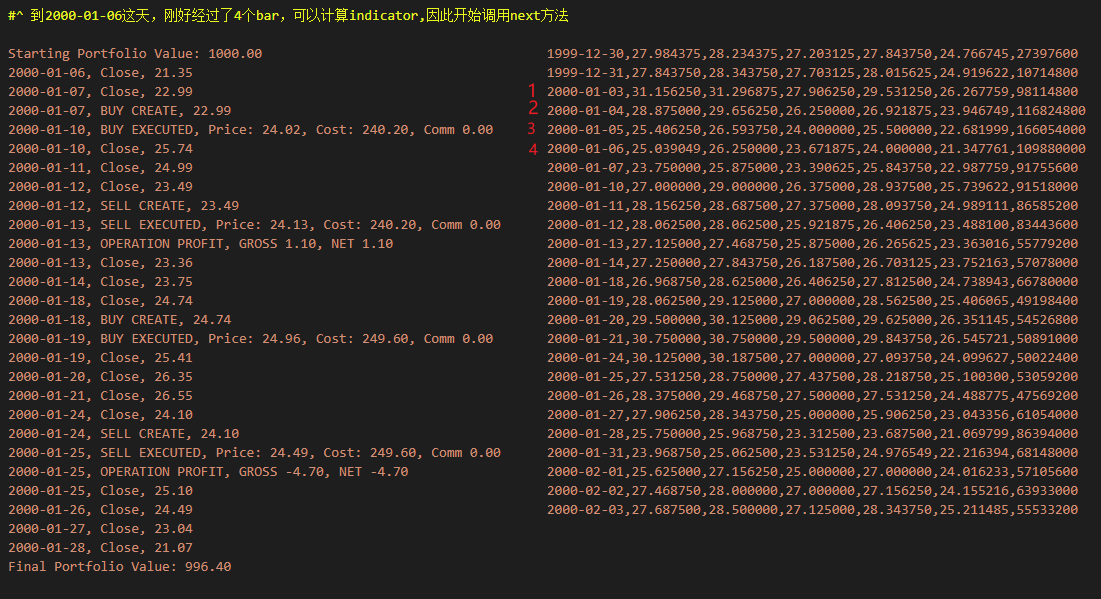

# Visual Inspection: Plotting
Even if indicators are not explicitly added to a member variable of the strategy (like self.sma = MovingAverageSimple…), they will autoregister with the strategy and will influence the minimum period for next and will be part of the plotting.

As explained before, the platform will first call next when all indicators are ready to produce a value.

`def plot(self, plotter=None, numfigs=1, iplot=True, **kwargs):`

`iplot`: automatically plot inline if running inside a Jupyter Notebook

Starting Portfolio Value: 1000.00
Final Portfolio Value: 982.30


<IPython.core.display.Javascript object>


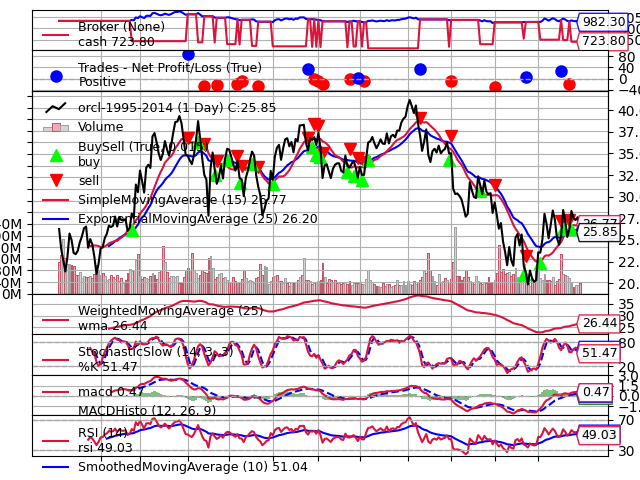

In [27]:
# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('maperiod', 15),
    )

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        #dt = dt or self.datas[0].datetime.date(0)
        #print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add a MovingAverageSimple indicator
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.maperiod)

        # Indicators for the plotting show
        #!Even if indicators are not explicitly added to a member variable of the strategy (like self.sma = MovingAverageSimple…), 
        #!they will autoregister with thestrategy and will influence the minimum period for next and will be part of the plotting.
        #!the platform will first call next when all indicators are ready to produce a value. 
        bt.indicators.ExponentialMovingAverage(self.datas[0], period=25)
        
        #Whether to plot the indicator in a different window.
        bt.indicators.WeightedMovingAverage(self.datas[0], period=25,subplot=True)
        bt.indicators.StochasticSlow(self.datas[0])
        bt.indicators.MACDHisto(self.datas[0])
        #^In the example only RSI is added to a temporary variable rsi with the only intention to create a MovingAverageSmoothed on it.
        rsi = bt.indicators.RSI(self.datas[0])
        bt.indicators.SmoothedMovingAverage(rsi, period=10)
        #bt.indicators.ATR(self.datas[0], plot=False)
        bt.indicators.ATR(self.datas[0],plot=False)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] > self.sma[0]:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.dataclose[0] < self.sma[0]:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))
    datapath = os.path.join(modpath, 'datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(1000.0)

    # Add a FixedSize sizer according to the stake
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)

    # Set the commission
    cerebro.broker.setcommission(commission=0.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Plot the result
    #%matplotlib qt
    #cerebro.plot(iplot=False)
    cerebro.plot()

# Let’s Optimize
Instead of calling addstrategy to add a stratey class to Cerebro, the call is made to optstrategy. And instead of passing a value a range of values is passed.

One of the “Strategy” hooks is added, the stop method, which will be called when the data has been exhausted and backtesting is over. It’s used to print the final net value of the portfolio in the broker

In [27]:
# Create a Stratey
class TestStrategy(bt.Strategy):
    params = (
        ('maperiod', 15),
        ('printlog', False),
    )

    def log(self, txt, dt=None, doprint=False):
        ''' Logging function fot this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # Add a MovingAverageSimple indicator
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.maperiod)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.dataclose[0] > self.sma[0]:

                # BUY, BUY, BUY!!! (with all possible default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            if self.dataclose[0] < self.sma[0]:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()

    #!One of the “Strategy” hooks is added, the stop method, 
    #!which will be called when the data has been exhausted and backtesting is over. 
    #!It’s used to print the final net value of the portfolio in the broker (it was done in Cerebro previously)
    def stop(self):
        self.log('(MA Period %2d) Ending Value %.2f' %
                 (self.params.maperiod, self.broker.getvalue()), doprint=True)


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    #!Instead of calling addstrategy to add a stratey class to Cerebro, the call is made to optstrategy.
    #!And instead of passing a value a range of values is passed.
    strats = cerebro.optstrategy(
        TestStrategy,
        maperiod=range(10, 31))

    ####################################
    # Add a strategy
    #cerebro.addstrategy(TestStrategy)
    #####################################

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    modpath = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath('__file__'))))
    datapath = os.path.join(modpath, 'datas/orcl-1995-2014.txt')

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname=datapath,
        # Do not pass values before this date
        fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2000, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(1000.0)

    # Add a FixedSize sizer according to the stake
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)

    # Set the commission
    cerebro.broker.setcommission(commission=0.0)

    # Run over everything
    cerebro.run(maxcpus=1)


2000-12-29, (MA Period 10) Ending Value 877.50
2000-12-29, (MA Period 11) Ending Value 878.70
2000-12-29, (MA Period 12) Ending Value 839.80
2000-12-29, (MA Period 13) Ending Value 899.90
2000-12-29, (MA Period 14) Ending Value 902.50
2000-12-29, (MA Period 15) Ending Value 975.60
2000-12-29, (MA Period 16) Ending Value 961.90
2000-12-29, (MA Period 17) Ending Value 952.60
2000-12-29, (MA Period 18) Ending Value 1011.00
2000-12-29, (MA Period 19) Ending Value 1039.40
2000-12-29, (MA Period 20) Ending Value 1073.20
2000-12-29, (MA Period 21) Ending Value 1055.10
2000-12-29, (MA Period 22) Ending Value 1057.60
2000-12-29, (MA Period 23) Ending Value 1021.50
2000-12-29, (MA Period 24) Ending Value 1018.80
2000-12-29, (MA Period 25) Ending Value 1012.40
2000-12-29, (MA Period 26) Ending Value 998.30
2000-12-29, (MA Period 27) Ending Value 983.10
2000-12-29, (MA Period 28) Ending Value 976.90
2000-12-29, (MA Period 29) Ending Value 984.20
2000-12-29, (MA Period 30) Ending Value 980.80


# Conclusion
A lot more can be done to try to improve the chances of winning:

- Self defined Indicators
    
    Creating an indicator is easy (and even plotting them is easy)
    
- Sizers
    
    Money Management is for many the key to success
    
- Order Types (limit, stop, stoplimit)
    
- Some others